**Análisis Exploratorio de Datos**

Importar librerías:

In [2]:
# importar bibliotecas:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Leer dataset

In [3]:
df_review= pd.read_csv('reviews.csv')

In [4]:
df_review.head(3)

,user_id,funny,item_id,helpful,recommend,review
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,This game is fantastic if you are looking to D...
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,PayDay on the difficulty scale Normal lolwut...
2,Lord_Exploit,1 person found this review funny,311560,6 of 10 people (60%) found this review helpful,True,So after odd hours i thought id write a reaso...


In [5]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1160 non-null   object
 1   funny      1160 non-null   object
 2   item_id    1160 non-null   int64 
 3   helpful    1160 non-null   object
 4   recommend  1160 non-null   bool  
 5   review     1152 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 46.6+ KB


In [6]:
# La siguiente función inspecciona los datos e identifica  valores nulos en todas las columnas.

def data_inspeccion(variables):
    print(f'Shape: {variables.shape}')
    print(f'\nDatos faltantes:')
    for columna in variables.columns:
        cantidad_nulos = variables[columna].isnull().sum()
        print(f'{columna}: {cantidad_nulos} valores nulos')

data_inspeccion(df_review)

Shape: (1160, 6)

Datos faltantes:
user_id: 0 valores nulos
funny: 0 valores nulos
item_id: 0 valores nulos
helpful: 0 valores nulos
recommend: 0 valores nulos
review: 8 valores nulos


In [7]:
# Eliminar las filas con valores nulos 
df_review.dropna(inplace=True)

data_inspeccion(df_review)

Shape: (1152, 6)

Datos faltantes:
user_id: 0 valores nulos
funny: 0 valores nulos
item_id: 0 valores nulos
helpful: 0 valores nulos
recommend: 0 valores nulos
review: 0 valores nulos


Columna de sentimiento:

In [8]:
def analisis_sentimiento(review):
    analisis = TextBlob(str(review))
    # Clasificar la polaridad de la reseña
    if analisis.sentiment.polarity > 0:
        return 2  # Positivo
    elif analisis.sentiment.polarity < 0:
        return 0  # Malo
    else:
        return 1  # Neutral

# Aplicar el análisis de sentimiento a la columna 'review' y crear 'sentiment_analysis'
df_review['sentiment_analysis'] = df_review['review'].apply(analisis_sentimiento)

# Reemplazar la columna 'review' con 'sentiment_analysis'
df_review.drop(columns=['review'], inplace=True)

# Rellenar con 1 si la reseña está ausente
df_review['sentiment_analysis'].fillna(1, inplace=True)

In [9]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 0 to 1159
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             1152 non-null   object
 1   funny               1152 non-null   object
 2   item_id             1152 non-null   int64 
 3   helpful             1152 non-null   object
 4   recommend           1152 non-null   bool  
 5   sentiment_analysis  1152 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 55.1+ KB


In [10]:
def data_inspeccion(variables):
    print(f'Shape: {variables.shape}')
    print(f'\nDatos faltantes:')
    for columna in variables.columns:
        cantidad_nulos = df_review[columna].isnull().sum()
        print(f'{columna}: {cantidad_nulos} valores nulos')

data_inspeccion(df_review)

Shape: (1152, 6)

Datos faltantes:
user_id: 0 valores nulos
funny: 0 valores nulos
item_id: 0 valores nulos
helpful: 0 valores nulos
recommend: 0 valores nulos
sentiment_analysis: 0 valores nulos


In [11]:
df_review.head(3)

,user_id,funny,item_id,helpful,recommend,sentiment_analysis
0,Wackky,1 person found this review funny,550,1 of 1 people (100%) found this review helpful,True,1
1,kevinator23,1 person found this review funny,218620,2 of 5 people (40%) found this review helpful,True,0
2,Lord_Exploit,1 person found this review funny,311560,6 of 10 people (60%) found this review helpful,True,2


In [12]:
#  Estadísticas resumidas de columnas numéricas
df_review.describe() 

,item_id,sentiment_analysis
count,1152.000000,1152.000000
mean,201075.483507,1.201389
std,146584.550344,0.896599
min,20.000000,0.000000
25%,12210.000000,0.000000
50%,230775.000000,2.000000
75%,316367.500000,2.000000
max,516040.000000,2.000000


Analisis del Dataset 'items'

In [13]:
df_items = pd.read_csv('items.csv')
df_items.head(3)

,user_id,items_count,item_id,item_name,playtime_forever
0,76561197970982479,277,10,CounterStrike,6
1,76561197970982479,277,20,Team Fortress Classic,0
2,76561197970982479,277,30,Day of Defeat,7


In [14]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094092 entries, 0 to 5094091
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
dtypes: int64(3), object(2)
memory usage: 194.3+ MB


In [15]:
# Analizamos la columna 'item_name' en busca de valores nulos
columna_item_name = df_items['item_name'] # Selecciono la columna 'item_name'
valores_nulos = columna_item_name.isnull().sum()  # Cuento la cantidad de valores nulos en la columna

# Muestro la cantidad de valores nulos y los primeros valores no nulos en la columna
print(f"Valores nulos en la columna 'item_name': {valores_nulos}")
print("\nPrimeros valores no nulos en la columna:")
print(columna_item_name.dropna().head())  # Muestro los primeros valores no nulos

Valores nulos en la columna 'item_name': 1090

Primeros valores no nulos en la columna:
0              CounterStrike
1      Team Fortress Classic
2              Day of Defeat
3         Deathmatch Classic
4    HalfLife Opposing Force
Name: item_name, dtype: object


In [16]:
# Eliminare las filas con valores nulos en todo el DataFrame
df_items.dropna(inplace=True)

# Verifico que se hayan eliminado
valores_nulos_despues = df_items.isnull().sum()



In [17]:
valores_nulos_despues 

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

In [18]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5093002 entries, 0 to 5094091
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
dtypes: int64(3), object(2)
memory usage: 233.1+ MB


In [19]:
# include='all' proporciona un resumen adicional de los datos
df_items.describe(include='all')

,user_id,items_count,item_id,item_name,playtime_forever
count,5093002,5.093002e+06,5.093002e+06,5093002,5.093002e+06
unique,70912,NaN,NaN,10730,NaN
top,phrostb,NaN,NaN,Dota Test,NaN
freq,7760,NaN,NaN,49136,NaN
mean,NaN,3.156822e+02,1.783790e+05,NaN,9.906783e+02
std,NaN,6.968567e+02,1.318627e+05,NaN,5.414601e+03
min,NaN,1.000000e+00,1.000000e+01,NaN,0.000000e+00
25%,NaN,7.100000e+01,3.445000e+04,NaN,0.000000e+00
50%,NaN,1.370000e+02,2.144200e+05,NaN,3.400000e+01
75%,NaN,2.750000e+02,2.664300e+05,NaN,3.550000e+02


In [20]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5093002 entries, 0 to 5094091
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   items_count       int64 
 2   item_id           int64 
 3   item_name         object
 4   playtime_forever  int64 
dtypes: int64(3), object(2)
memory usage: 233.1+ MB


Analisis del Dataset 'games'

In [21]:
df_games= pd.read_csv('games.csv')

In [22]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22510 entries, 0 to 22509
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22475 non-null  object
 1   genres        22510 non-null  object
 2   app_name      22491 non-null  object
 3   title         22491 non-null  object
 4   release_date  22510 non-null  object
 5   tags          22510 non-null  object
 6   specs         22510 non-null  object
 7   price         22510 non-null  object
 8   developer     22463 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [23]:
# Eliminare las filas con valores nulos en todo el DataFrame
df_games.dropna(inplace=True)

# Verifico que se hayan eliminado
valores_nulos_despues = df_games.isnull().sum()

# Muestro la cantidad de valores nulos después de eliminarlos


In [24]:
df_games.describe()

,publisher,genres,app_name,title,release_date,tags,specs,price,developer
count,22446,22446,22446,22446,22446,22446,22446,22446,22446
unique,7757,803,21872,21872,3209,12404,3311,132,10170
top,Ubisoft,Action,Train Simulator BR Class Loco AddOn,Train Simulator BR Class Loco AddOn,2012-10-16,Simulation,Singleplayer,9.99,Dovetail Games
freq,366,1573,12,12,100,964,2622,3166,253


Algunas graficas para comprender mejor los datos

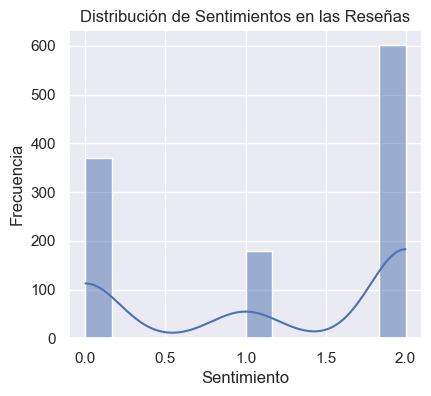

ValueError: Could not interpret value `playtime_2weeks` for parameter `y`

<Figure size 800x600 with 0 Axes>

In [25]:
# Creación de un histograma para la columna 'sentiment_analysis'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_review['sentiment_analysis'], kde=True)
plt.title('Distribución de Sentimientos en las Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Crear un gráfico de dispersión para mi Dataframe 'df_items' 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_items, x='playtime_forever', y='playtime_2weeks')
plt.title('Gráfico de Dispersión entre playtime_forever y playtime_2weeks')
plt.xlabel('playtime_forever')
plt.ylabel('playtime_2weeks')
plt.show()

# Esto agrupa los valores y cuenta cuántas veces aparece cada uno
genres_counts = df_games['genres'].value_counts()

# Voy a crear un gráfico de barras para 'df_games' 
plt.figure(figsize=(12, 6))  # Establece el tamaño del gráfico
sns.barplot(x=genres_counts[:10], y=genres_counts.index[:10], palette="viridis")

# etiquetamos
plt.xlabel("Número de Juegos")
plt.ylabel("Género")
plt.title("Los 10 géneros más comunes en el DataFrame")
plt.show()

Creacion de DataFrames para las funciones requeridas 

In [ ]:
# Selecciona las columnas 'genres' y 'release_date' del DataFrame df_games
df_PlayTimeGenre = df_games[['genres', 'release_date']]

# Selecciona la columna 'playtime_forever' del DataFrame df_items
df_items_subset = df_items[['playtime_forever','item_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
PlayTimeGenre = pd.concat([df_PlayTimeGenre, df_items_subset], axis=1)

In [ ]:
PlayTimeGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22441 entries, 0 to 22509
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            22441 non-null  object 
 1   release_date      22441 non-null  object 
 2   playtime_forever  22441 non-null  float64
 3   item_id           22441 non-null  float64
dtypes: float64(2), object(2)
memory usage: 876.6+ KB


In [ ]:
#Eliminando valores nulos para reducir tamaño
PlayTimeGenre.dropna(inplace=True)

In [ ]:
PlayTimeGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22441 entries, 0 to 22509
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            22441 non-null  object 
 1   release_date      22441 non-null  object 
 2   playtime_forever  22441 non-null  float64
 3   item_id           22441 non-null  float64
dtypes: float64(2), object(2)
memory usage: 876.6+ KB


In [ ]:
PlayTimeGenre.to_csv('PlayTimeGenre.csv', index=False)

In [ ]:
# Selecciona las columnas 'genres' y 'release_date' del DataFrame df_games
df_UserForGenre = df_games[['genres', 'release_date']]

# Selecciona la columna 'playtime_forever' del DataFrame df_items
df_items_subset = df_items[['playtime_forever','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
UserForGenre = pd.concat([df_UserForGenre, df_items_subset], axis=1)

In [ ]:
UserForGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5093007 entries, 0 to 5094091
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genres            object 
 1   release_date      object 
 2   playtime_forever  float64
 3   user_id           object 
dtypes: float64(1), object(3)
memory usage: 194.3+ MB


In [ ]:
UserForGenre.dropna(inplace=True)

In [ ]:
UserForGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22441 entries, 0 to 22509
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            22441 non-null  object 
 1   release_date      22441 non-null  object 
 2   playtime_forever  22441 non-null  float64
 3   user_id           22441 non-null  object 
dtypes: float64(1), object(3)
memory usage: 876.6+ KB


In [ ]:
UserForGenre.to_csv('UserForGenre.csv', index=False)

In [ ]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_UsersRecommend = df_games[['title', 'release_date']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['recommend','user_id','sentiment_analysis']]

# Combina las columnas seleccionadas en un nuevo DataFrame
UsersRecommend = pd.concat([df_UsersRecommend, df_review_subset], axis=1)

In [ ]:
UsersRecommend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22447 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               22446 non-null  object 
 1   release_date        22446 non-null  object 
 2   recommend           1152 non-null   object 
 3   user_id             1152 non-null   object 
 4   sentiment_analysis  1152 non-null   float64
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
UsersRecommend.dropna(inplace=True)

In [ ]:
UsersRecommend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 0 to 1159
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1151 non-null   object 
 1   release_date        1151 non-null   object 
 2   recommend           1151 non-null   object 
 3   user_id             1151 non-null   object 
 4   sentiment_analysis  1151 non-null   float64
dtypes: float64(1), object(4)
memory usage: 54.0+ KB


In [ ]:
UsersRecommend.to_csv('UsersRecommend.csv', index=False)

In [ ]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_UsersWorstDeveloper = df_games[['title', 'release_date']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['recommend','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
UsersWorstDeveloper = pd.concat([df_UsersNotRecommend, df_review_subset], axis=1)

In [ ]:
UsersWorstDeveloper.dropna(inplace=True)

In [ ]:
UsersWorstDeveloper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 0 to 1159
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1151 non-null   object
 1   release_date  1151 non-null   object
 2   recommend     1151 non-null   object
 3   user_id       1151 non-null   object
dtypes: object(4)
memory usage: 45.0+ KB


In [ ]:
UsersWorstDeveloper.to_csv('UsersWorstDeveloper.csv', index=False)

In [ ]:
# Selecciona las columnas 'title' y 'release_date' del DataFrame df_games
df_sentiment_analysis = df_games[['release_date']]

# Selecciona la columna 'recommend', 'user_id' del DataFrame df_review
df_review_subset = df_review[['sentiment_analysis','user_id']]

# Combina las columnas seleccionadas en un nuevo DataFrame
sentiment_analysis = pd.concat([df_sentiment_analysis, df_review_subset], axis=1)

In [ ]:
sentiment_analysis.dropna(inplace=True)

In [ ]:
sentiment_analysis.to_csv('sentiment_analysis.csv', index=False)